# Advanced MLP
(Multi-Layer Perceptron)

- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


## Load Dataset
- MNIST dataset

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

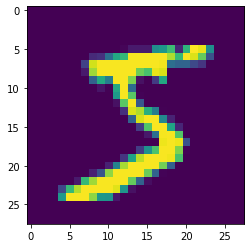

Label:  5


In [22]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

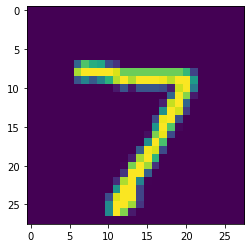

Label:  7


In [23]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

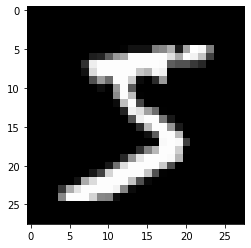

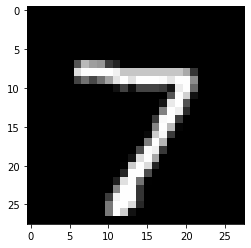

In [15]:
plt.imshow(X_train[0],cmap="gray")
plt.show()

plt.imshow(X_test[0], cmap="gray")    # show first number in the dataset
plt.show()

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.shape[0] #개수

60000

In [17]:
# reshaping X data: (n, 28, 28) => (n, 784)
# X set 2차원을 1차원으로
X_train = X_train.reshape((X_train.shape[0], -1))  #나머지 영역을 묶어 한차원으로
X_test = X_test.reshape((X_test.shape[0], -1))

In [5]:
X_train.shape

(60000, 784)

In [13]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)
#자주 쓰는 함수라서. split하여 (1-p), p 순으로 리턴

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train)

(19800, 784) (10000, 784) (19800,) (10000,)
[6 9 2 ... 5 5 3]


In [14]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# one-hot encoding: 1차원 벡터->2차원 벡터
# 0 -> 1 0 0  이 한 줄이 one binary class
# 1 -> 0 1 0  행렬로 구하면 빨라
# 2 -> 0 0 1

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#y_test.shape = (10000,10)  class가 0~9

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [55]:
model = Sequential()

In [56]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
#binary 땐 sigmoid 썼지만
#multiple는 softmax 사용. binary와 똑같지만 여러번 처리
#softmax: sigmoid와의 차이점은 정규화해줌 (값의 합 1로 scaling)
#출력갯수 10개, class가 10개니까

In [57]:
# optimzer="adam" 은 디폴트값밖에 못 써. 아래처럼 사용하면 learning rate 설정 가능
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)
#validation_split: train data를 내부적으로 또 나눠.
#70개는 학습, 30개는 validation data set으로 사용하겠다
#내가 학습을 제대로 하고 있는지 검증하는 또다른 test set. overfitting 검사가능

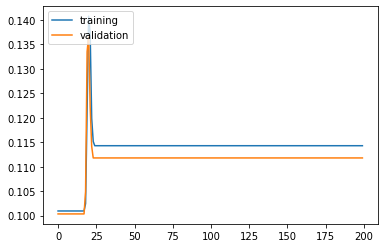

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
#정확도가 12프로 정도. 학습을 못 하고 있어.
#원인은 sigmoid
#그래프가 일자인 것은 w값 변화가 거의 없다는 것.
#극악의 확률로 잘 될 수는 있겠지만.

In [40]:
print(history.history)

{'val_loss': [2.556286112467448, 2.517122162552394, 2.486293351208722, 2.4610053137898045, 2.440118757883708, 2.422298244835953, 2.4069682169442226, 2.393910729122483, 2.3826261499514083, 2.3727671655340226, 2.3642784853976986, 2.356688284151482, 2.35004657832059, 2.3441796498667915, 2.3390173716175835, 2.33436187140468, 2.330350992254135, 2.326760318704727, 2.323590223877518, 2.3207642812118787, 2.3182409565858166, 2.316005346189043, 2.3141048752498947, 2.3123332688302707, 2.310881105898205, 2.309621216552426, 2.308474305502895, 2.307440174629391, 2.3065472980139634, 2.305750858743584, 2.305008667326134, 2.304431055370806, 2.3039071018848354, 2.3034222946423872, 2.303016436059868, 2.30266198662395, 2.3023519082502886, 2.302064887602321, 2.301815940394546, 2.301608460358899, 2.3014272558167326, 2.3012647001028865, 2.3011081302206122, 2.3009762386681656, 2.3008813856426715, 2.3007764840366867, 2.3006994377483023, 2.3006101996810346, 2.3005189802510166, 2.30043584248835, 2.30036449689255

- validation data 없으면

In [41]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 10, verbose = 0)
print(history.history)

{'loss': [2.295653854042593, 2.2956013844229957, 2.295555698992026, 2.2955088171332774, 2.295470286667949, 2.295427455805769, 2.295384081927213, 2.2953451635379984, 2.2953113043428672, 2.295272810290558], 'accuracy': [0.11353535, 0.11353535, 0.11353535, 0.11353535, 0.11353535, 0.11353535, 0.11353535, 0.11353535, 0.11353535, 0.11353535]}


In [42]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 10, verbose = 0)
print(history.history)
#validation 따로 주니까 validation에 관한 정보도 나온다

{'val_loss': [2.2960299602662673, 2.2960321541988487, 2.296023728951862, 2.2960223172248813, 2.2960303508874143, 2.2960287124620944, 2.2960369259420066, 2.29601827759534, 2.2960135781002364, 2.295989504085245], 'val_accuracy': [0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457, 0.11178451031446457], 'loss': [2.294896826530776, 2.294866594504484, 2.294836520873451, 2.2948089086992227, 2.294782163226415, 2.2947543235740278, 2.294725632839561, 2.29469924076295, 2.2946726799011232, 2.2946466223674076], 'accuracy': [0.114285715, 0.114285715, 0.114285715, 0.114285715, 0.114285715, 0.114285715, 0.114285715, 0.114285715, 0.114285715, 0.114285715]}


* Training and validation accuracy seems to improve after around 60 epochs

In [49]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [50]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization
입력 데이터의 노드 수와 출력 데이터의 노드 수 이용  
- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [51]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [60]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

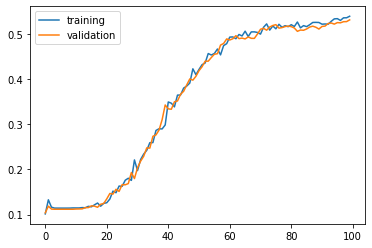

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
#어느 순간에 초기화를 잘 해서 쭉 올라가.
#정확도가 45퍼센트로 확 뜀
#초기값을 적절히 잘 세팅해야 해.

In [62]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [63]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5299000144004822


## 2. Nonlinearity (Activation function)

In [64]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

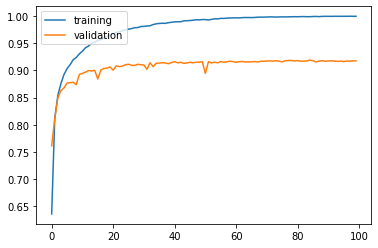

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
#마지막 값이 아니라, 그 중에서 validation value 가장 좋았던 값을 저장.

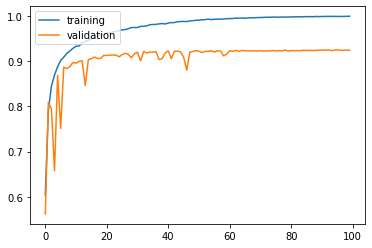

In [72]:
# train 2nd
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
#마지막 값이 아니라, 그 중에서 validation value 가장 좋았던 값을 저장.

ReLU 함수는 초기화 신경 안 써도 잘 됨 거의 90%  
Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [67]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/step


In [68]:
print('Test accuracy: ', results[1])

Test accuracy:  0.91839998960495


In [71]:
print(results)
print('Loss: ', results[0])

[0.5333931315261445, 0.91839998960495]
Loss:  0.5333931315261445


## 3. Optimizers

In [73]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)       # use Adam optimizer #0.01도 큼
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [74]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

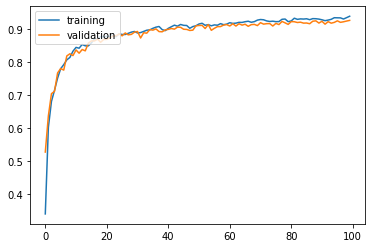

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs  
sigmoid, 초기값 안 좋아도 optimizer로 성능 향상

In [76]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/step


In [77]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9261000156402588


## 4. Batch Normalization
비선형 함수 변환 전에 추가해야.  
내부적으로 알아서 이동한 mean과 scaling은 저장했다가 나중에 되돌림

In [10]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       #층 하나 추가: 모든 입력을 정규화
                                          # 보통 activation 전에
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)    #sgd사용, lr매우 낮음
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [11]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

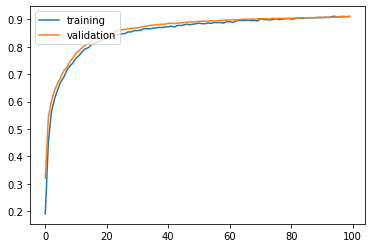

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

가장 나쁜 초기화 방법, 가장 느린 학습방법을 사용했음에도 불구하고 정확도 91%  
Batch Normalization: (이라는 층 하나 추가): 모든 입력을 정규분포화 (N(0,1))  
Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [81]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


In [82]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9114000201225281


## 5. Dropout (Regularization)

원래는 극명하게 overfitting 현상이 발생해야하는데 이 데이터는,,,  
앙상블 효과를 보려면 dropout 0.2는 작은 값.  

In [83]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [84]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

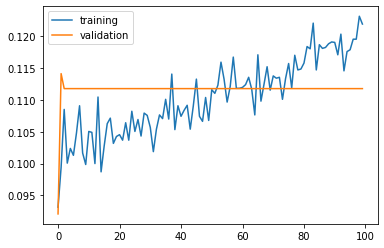

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
#training 변화폭이 큰 이유 - 학습시키고 dropout 시키니까

In [86]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [87]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble
argument max
- one-hot encoding의 index 찾을 때
- 몇번째 클래스인지 판단할 때

In [15]:
y_train = np.argmax(y_train, axis = 1)   #argmax: max값의 index 반환
y_test = np.argmax(y_test, axis = 1)

In [16]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


In [17]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [18]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
#서로 다른 모델 3개. 특별히 미니배치 사이즈 지정 안 했으므로 전체 배치로.

In [19]:
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3)], voting = 'soft')
#voting: 다수결 방식. hard/soft.
#soft: validation accuracy 반영해서 가중치 부여해서 결정

In [20]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 47us/step - loss: 2.3879 - acc: 0.0981
Epoch 2/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.3155 - acc: 0.0986
Epoch 3/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.3031 - acc: 0.1094
Epoch 4/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.3009 - acc: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.3003 - acc: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3001 - acc: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2998 - acc: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2996 - acc: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2993 - acc: 0.1135
Epoch 10/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2991 - a

19800/19800 [==============================] - 1s 35us/step - loss: 2.2675 - acc: 0.1336
Epoch 82/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2664 - acc: 0.1354
Epoch 83/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2653 - acc: 0.1371
Epoch 84/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2642 - acc: 0.1278
Epoch 85/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2630 - acc: 0.1510
Epoch 86/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2618 - acc: 0.1530
Epoch 87/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2605 - acc: 0.1417
Epoch 88/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2592 - acc: 0.1768
Epoch 89/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2578 - acc: 0.1603
Epoch 90/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2563 - acc: 

19800/19800 [==============================] - 1s 34us/step - loss: 2.2803 - acc: 0.1139
Epoch 62/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2797 - acc: 0.1137
Epoch 63/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2790 - acc: 0.1144
Epoch 64/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2783 - acc: 0.1153
Epoch 65/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2775 - acc: 0.1228: 0s - loss: 2.2777 - acc: 0.12
Epoch 66/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2768 - acc: 0.1200
Epoch 67/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2760 - acc: 0.1177
Epoch 68/100
19800/19800 [==============================] - 1s 31us/step - loss: 2.2752 - acc: 0.1283
Epoch 69/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2743 - acc: 0.1257
Epoch 70/100
19800/19800 [==============================] - 1s 3

19800/19800 [==============================] - 1s 34us/step - loss: 2.2920 - acc: 0.1135
Epoch 41/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2916 - acc: 0.1135
Epoch 42/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2913 - acc: 0.1135
Epoch 43/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2910 - acc: 0.1135
Epoch 44/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2907 - acc: 0.1135
Epoch 45/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2904 - acc: 0.1135
Epoch 46/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2900 - acc: 0.1135: 0s - loss: 2.2900 - acc: 0.1
Epoch 47/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2897 - acc: 0.1135
Epoch 48/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2893 - acc: 0.1135
Epoch 49/100
19800/19800 [==============================] - 1s 35

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BA71B87C8>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BA71B8788>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BA71B8808>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [21]:
y_pred = ensemble_clf.predict(X_test)

10000/10000 [==============================] - 0s 29us/step


In [22]:
print('Test accuracy:', accuracy_score(y_pred, y_test))
#합쳤더니 성능이 31%로 많이 늘어남 (랜덤수준은 10%에 비해서는).
#10개 쓰면 더 늘어나겠지

Test accuracy: 0.315


In [23]:
#relu로 바꾸면
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [24]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
#서로 다른 모델 3개. 특별히 미니배치 사이즈 지정 안 했으므로 전체 배치로.

In [25]:
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3)], voting = 'soft')
#voting: 다수결 방식. hard/soft.
#soft: validation accuracy 반영해서 가중치 부여해서 결정

In [26]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.1607 - acc: 0.6959
Epoch 2/100
19800/19800 [==============================] - 1s 34us/step - loss: 0.5553 - acc: 0.8492
Epoch 3/100
19800/19800 [==============================] - 1s 30us/step - loss: 0.4093 - acc: 0.8844
Epoch 4/100
19800/19800 [==============================] - 1s 33us/step - loss: 0.3390 - acc: 0.9010
Epoch 5/100
19800/19800 [==============================] - 1s 34us/step - loss: 0.2926 - acc: 0.9146
Epoch 6/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.2597 - acc: 0.9209
Epoch 7/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.2354 - acc: 0.9292
Epoch 8/100
19800/19800 [==============================] - 1s 33us/step - loss: 0.2142 - acc: 0.9357
Epoch 9/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.1955 - acc: 0.9399
Epoch 10/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.1842 - a

19800/19800 [==============================] - 1s 32us/step - loss: 0.0075 - acc: 0.9994
Epoch 82/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0072 - acc: 0.9994
Epoch 83/100
19800/19800 [==============================] - 1s 38us/step - loss: 0.0068 - acc: 0.9995
Epoch 84/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0069 - acc: 0.9994
Epoch 85/100
19800/19800 [==============================] - 1s 38us/step - loss: 0.0066 - acc: 0.9994
Epoch 86/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0064 - acc: 0.9995
Epoch 87/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0061 - acc: 0.9996
Epoch 88/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0058 - acc: 0.9996
Epoch 89/100
19800/19800 [==============================] - 1s 33us/step - loss: 0.0056 - acc: 0.9997
Epoch 90/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.0055 - acc: 

19800/19800 [==============================] - 1s 32us/step - loss: 0.0193 - acc: 0.9968
Epoch 61/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0185 - acc: 0.9966
Epoch 62/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0177 - acc: 0.9967
Epoch 63/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0170 - acc: 0.9971
Epoch 64/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.0165 - acc: 0.9975
Epoch 65/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.0159 - acc: 0.9975
Epoch 66/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0151 - acc: 0.9978
Epoch 67/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0144 - acc: 0.9978
Epoch 68/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0140 - acc: 0.9980
Epoch 69/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.0137 - acc: 

19800/19800 [==============================] - 1s 35us/step - loss: 0.0310 - acc: 0.9936
Epoch 41/100
19800/19800 [==============================] - 1s 35us/step - loss: 0.0296 - acc: 0.9936
Epoch 42/100
19800/19800 [==============================] - 1s 37us/step - loss: 0.0278 - acc: 0.9947
Epoch 43/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0268 - acc: 0.9945
Epoch 44/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0257 - acc: 0.9948
Epoch 45/100
19800/19800 [==============================] - 1s 33us/step - loss: 0.0242 - acc: 0.9951
Epoch 46/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0230 - acc: 0.9956
Epoch 47/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0215 - acc: 0.9966
Epoch 48/100
19800/19800 [==============================] - 1s 36us/step - loss: 0.0206 - acc: 0.9967
Epoch 49/100
19800/19800 [==============================] - 1s 34us/step - loss: 0.0198 - acc: 

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BB070F908>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BB070F9C8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BB070FC48>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [3]:
#다 섞음
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [4]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

In [5]:
def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

In [6]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)

In [7]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [8]:
ensemble_clf.fit(X_train, y_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.7813 - acc: 0.7607
Epoch 2/3
60000/60000 [==============================] - 3s 50us/step - loss: 0.4250 - acc: 0.8764
Epoch 3/3
60000/60000 [==============================] - 3s 51us/step - loss: 0.3657 - acc: 0.8965
Epoch 1/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.7584 - acc: 0.7682
Epoch 2/3
60000/60000 [==============================] - 3s 52us/step - loss: 0.4266 - acc: 0.8780
Epoch 3/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.3598 - acc: 0.8972


VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BAAE70D88>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BAAE70D48>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [9]:
y_pred = ensemble_clf.predict(X_test)

In [10]:
print('Acc: ', accuracy_score(y_pred, y_test))
#

Acc:  0.9605
